<a href="https://colab.research.google.com/github/tamojeetroychowdhury/Solar-Flares/blob/main/Solar_Flares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from astropy.io import fits
from astropy.convolution import convolve, Box1DKernel
import matplotlib.pyplot as plt
import numpy as np

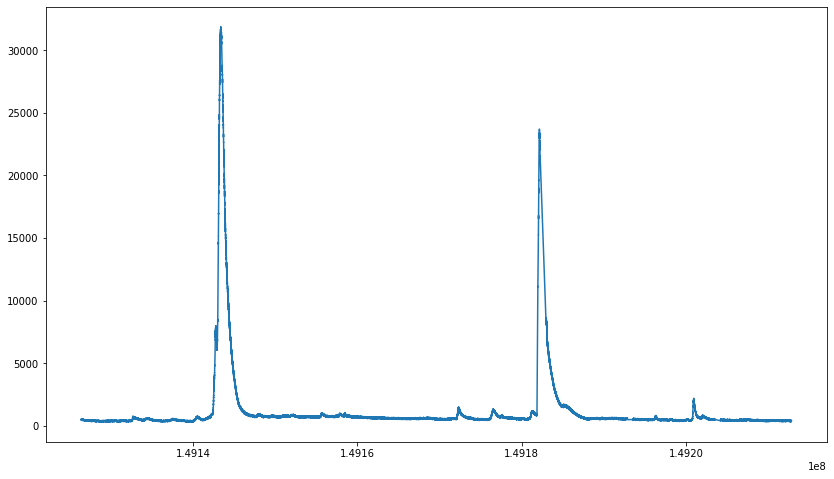

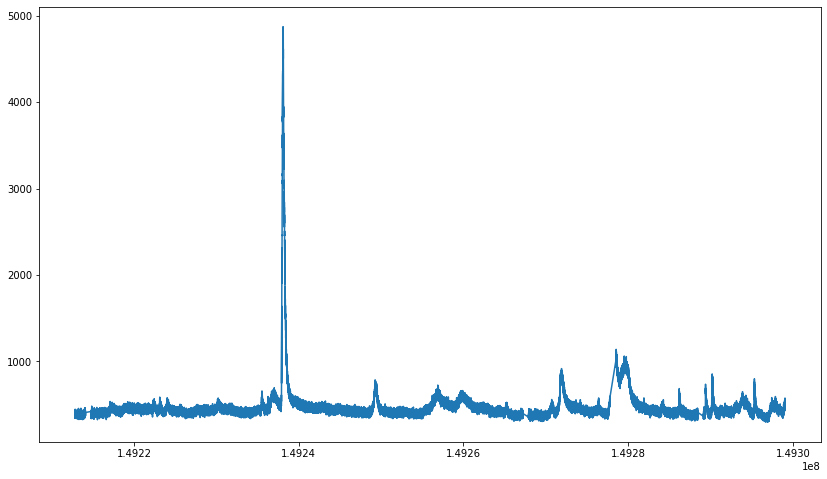

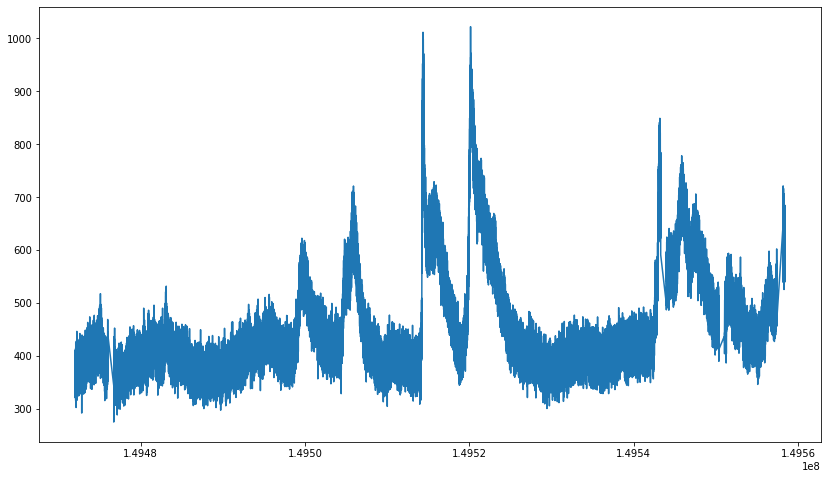

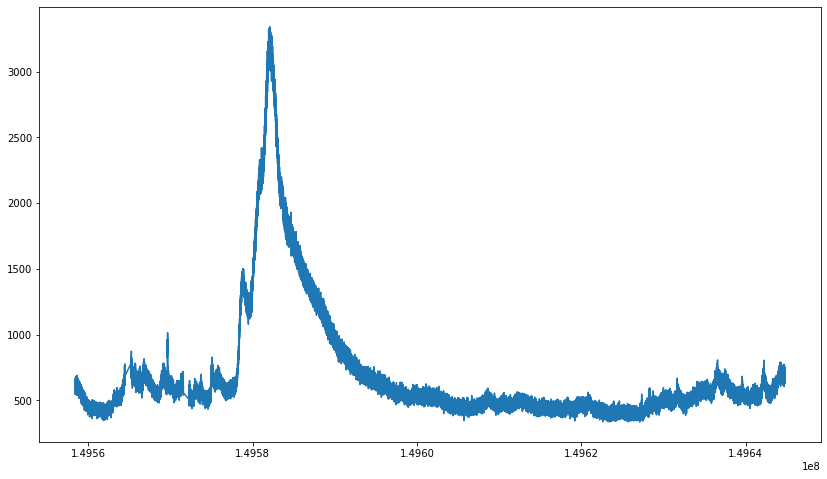

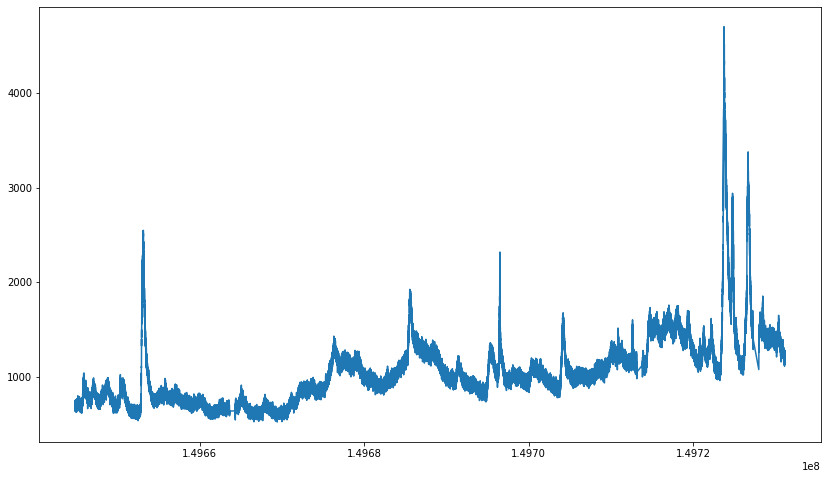

In [ ]:
l = ['3','4','7','8','9']

for i in l:
  f = fits.open('gdrive/My Drive/CAB - solar flares/Data/ch2_xsm_2021092{}_v1_level2.lc'.format(i))
  d = f[1].data
  plt.figure(figsize=(14,8))
  plt.plot(d.field(0),d.field(1))
  #plt.xlim(min(d.field(0)),max(d.field(0)))
  plt.show()

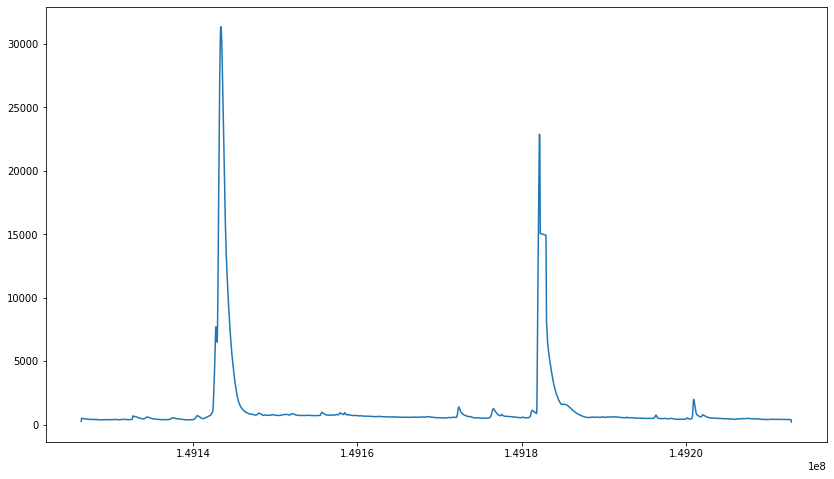

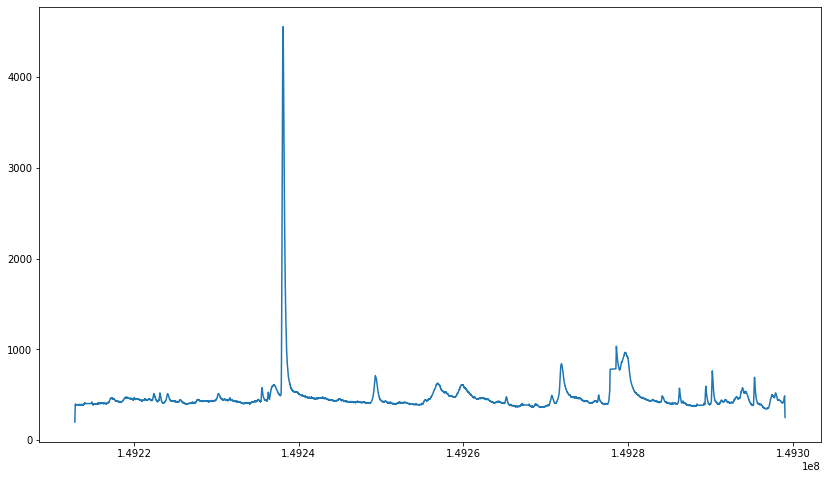

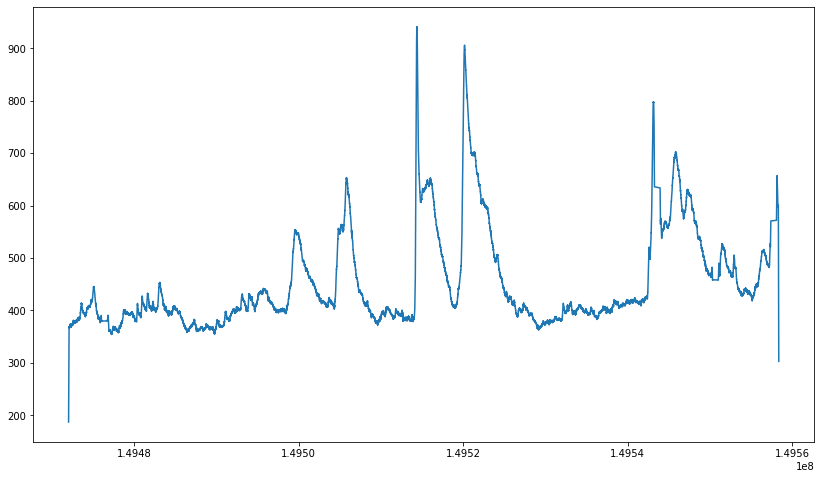

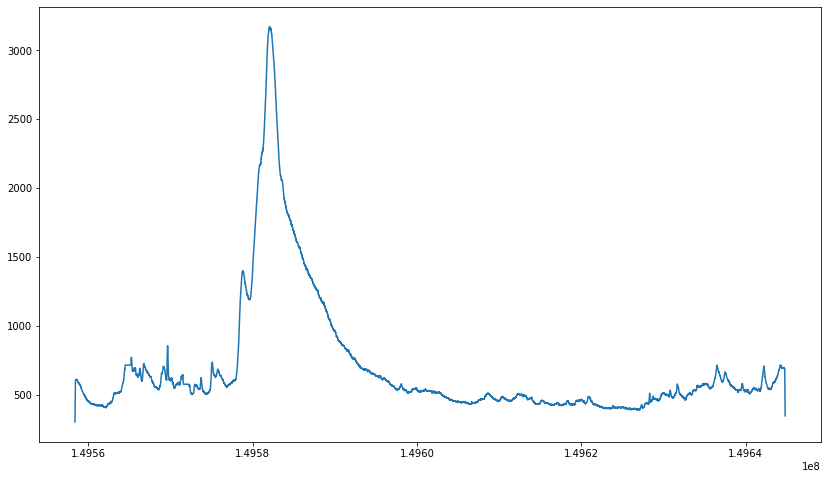

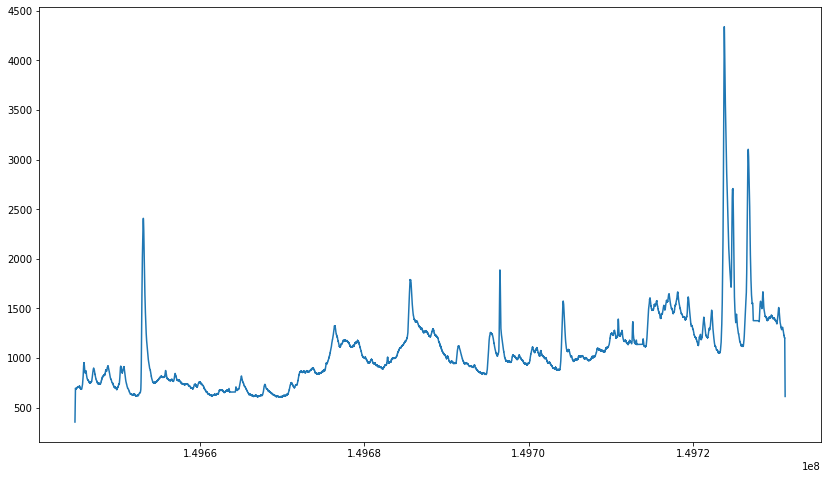

In [ ]:
l = ['3','4','7','8','9']

for i in l:
  f = fits.open('gdrive/My Drive/CAB - solar flares/Data/ch2_xsm_2021092{}_v1_level2.lc'.format(i))
  d = f[1].data
  plt.figure(figsize=(14,8))
  plt.plot(d.field(0),convolve(d.field(1),Box1DKernel(100)))
  #plt.xlim(min(d.field(0)),max(d.field(0)))
  plt.show()

In [ ]:
def rebin(l,n):
  m = []
  for i in range(0,len(l),n):
    s = 0
    for j in range(i-n,i):
      s += l[j]
    m.append(s)
  return m

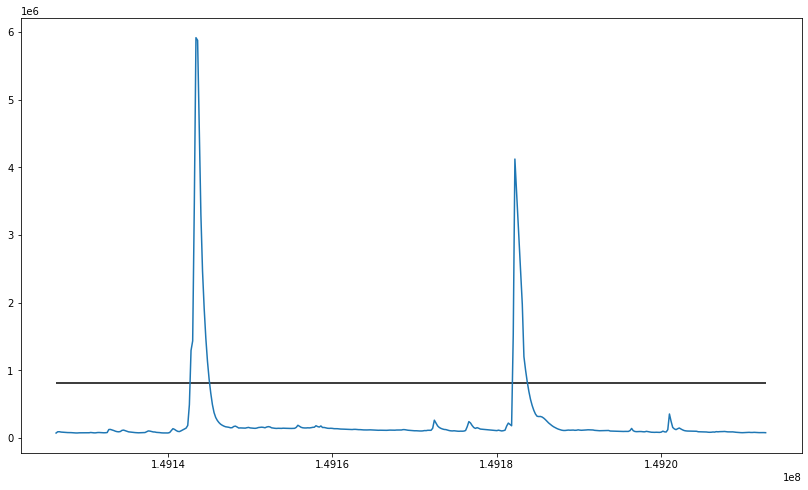

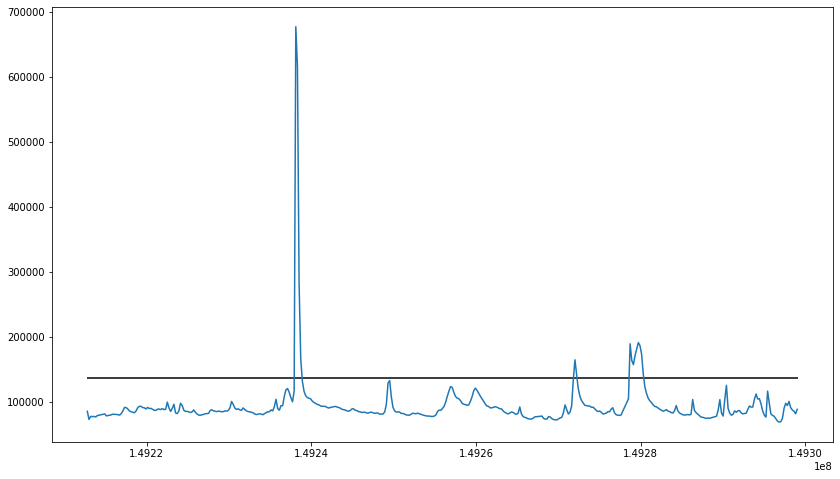

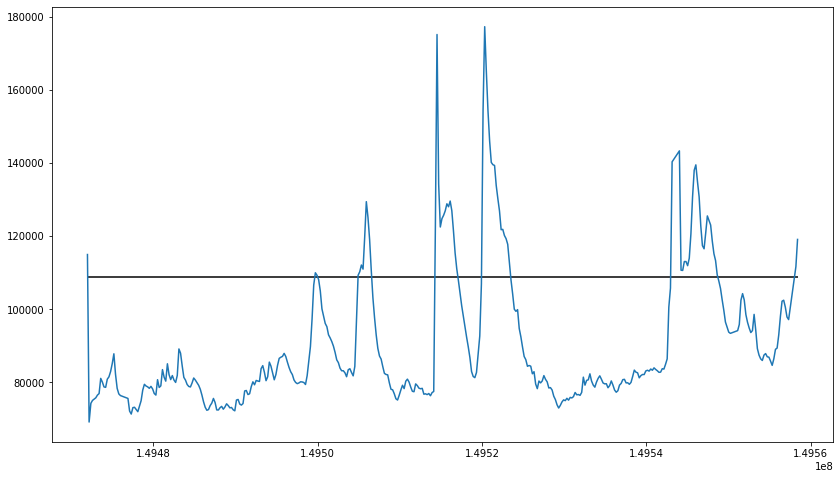

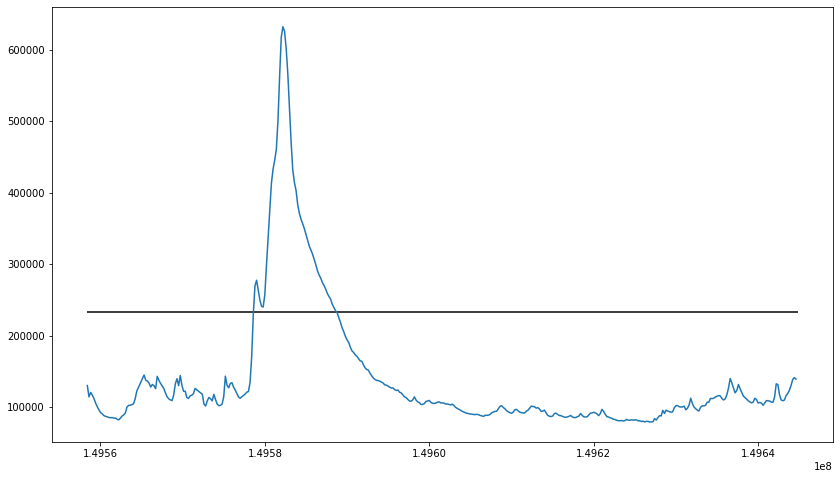

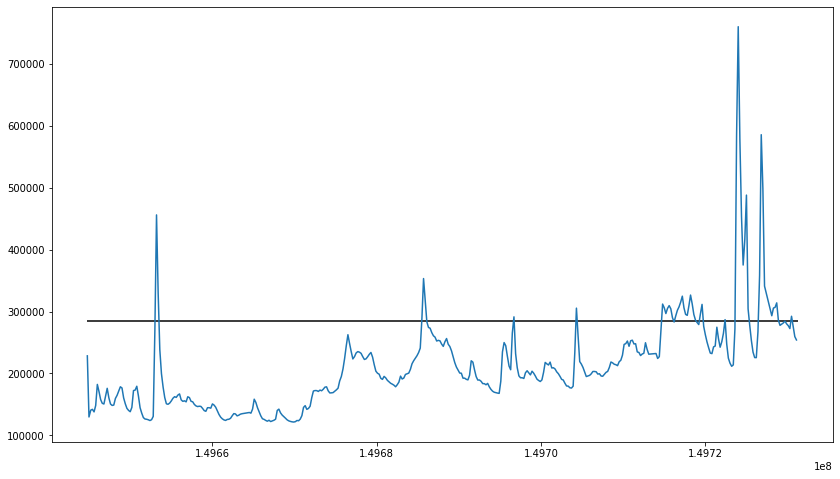

In [ ]:
l = ['3','4','7','8','9']
s=200
n=200
slopes = [49.63, 8.09, 1.115, 1.458, 2]

for i in l:
  f = fits.open('gdrive/My Drive/CAB - solar flares/Data/ch2_xsm_2021092{}_v1_level2.lc'.format(i))
  d = f[1].data
  plt.figure(figsize=(14,8))
  boxcar = convolve(d.field(1),Box1DKernel(100))
  times = d.field(0)
  plt.plot(times[::n],rebin(boxcar,n))
  mean = np.mean(rebin(boxcar,n))
  stddev = np.std(rebin(boxcar,n))
  plt.hlines([mean+stddev],min(d.field(0)),max(d.field(0)))
  '''starts = []
  for j in range(len(boxcar)-s):
    if (boxcar[j+s]-boxcar[j])/(times[j+s]-times[j]) > slopes[l.index(i)]:
      starts.append(i)
  print(len(starts)) '''
  #plt.xlim(min(d.field(0)),max(d.field(0)))
  plt.show()

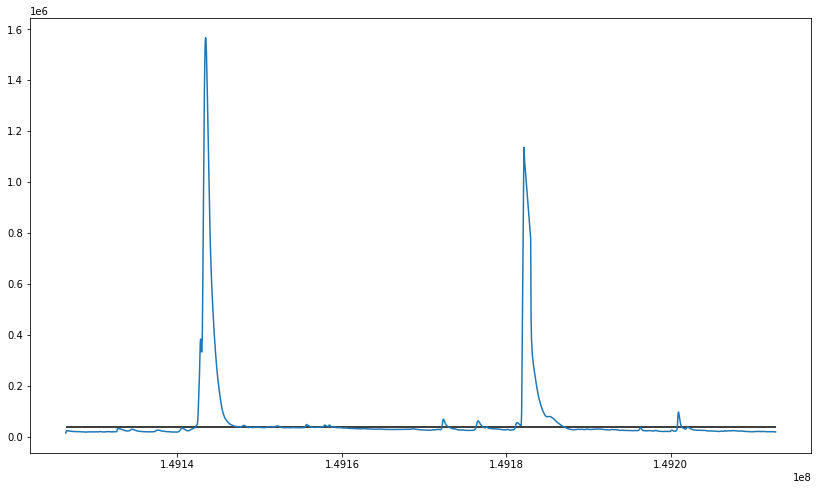

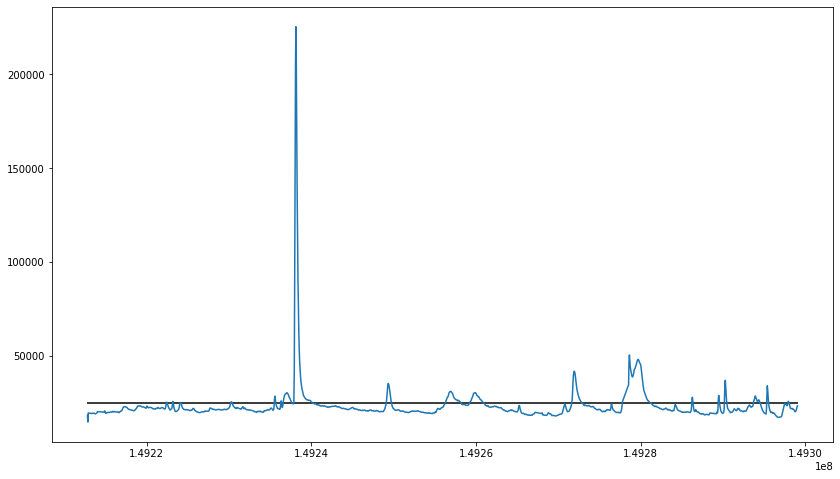

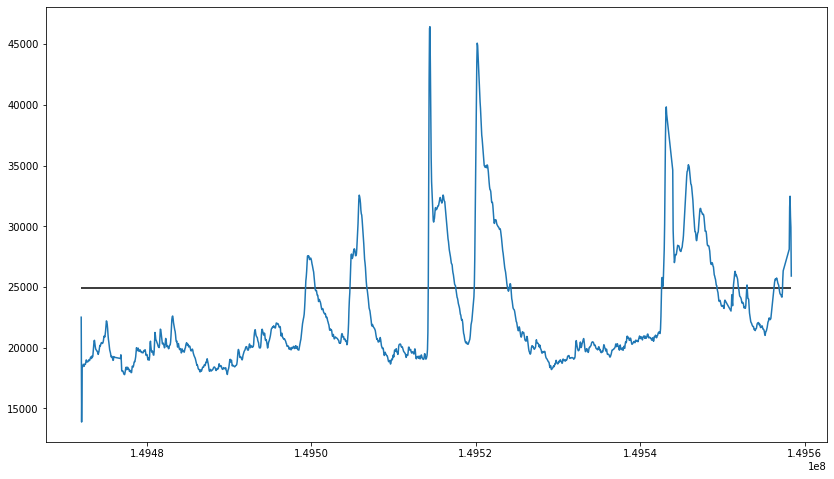

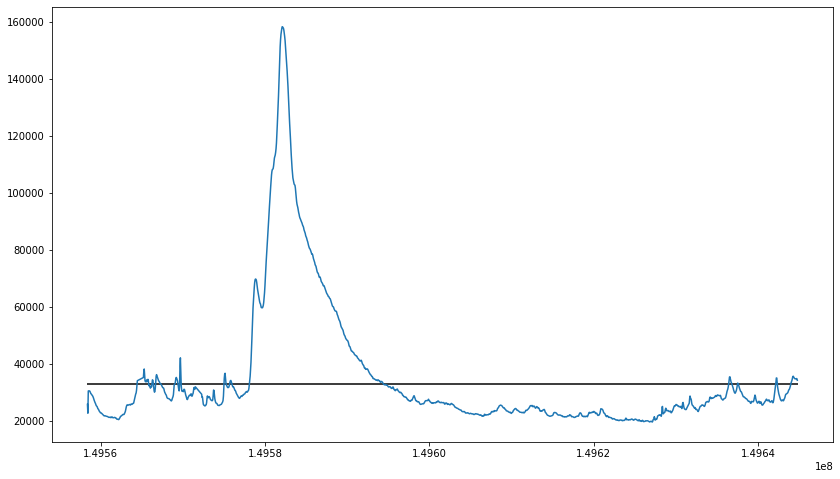

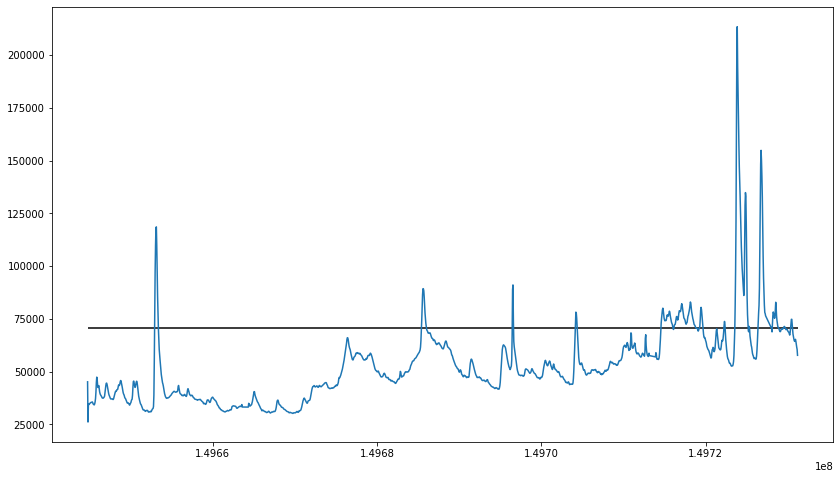

In [ ]:
from astropy.stats import sigma_clipped_stats as scs

l = ['3','4','7','8','9']
s=200
n=50
k = 1.5
#slopes = [49.63, 8.09, 1.115, 1.458, 2]

for i in l:
  f = fits.open('gdrive/My Drive/CAB - solar flares/Data/ch2_xsm_2021092{}_v1_level2.lc'.format(i))
  d = f[1].data
  plt.figure(figsize=(14,8))
  boxcar = convolve(d.field(1),Box1DKernel(100))
  times = d.field(0)
  newcount = rebin(boxcar,n)

  plt.plot(times[::n],newcount)
  mean, median, stddev = scs(newcount)
  plt.hlines([mean+k*stddev],min(d.field(0)),max(d.field(0)))
  '''starts = []
  for j in range(len(boxcar)-s):
    if (boxcar[j+s]-boxcar[j])/(times[j+s]-times[j]) > slopes[l.index(i)]:
      starts.append(i)
  print(len(starts)) '''
  #plt.xlim(min(d.field(0)),max(d.field(0)))
  plt.show()